# README: About this script

It is optimal to run this notebook in a separate python environment. I highly recommend running this using `virtualenv` or an **Anaconda Jupyter Notebook**. This script will not explain how to set up these environments - it's good practice to learn how to set up these environments on your local machines.

All relevant files and APKs are available at two locations: one on Google Drive, and another on Github. In either, you are free to download sample EEG data and the `.apk` file for the VR application. 

* **Google Drive Public Folder**: [https://drive.google.com/drive/folders/1hBshxxs70bkTOT0cswSCXQ0fp2N0_dlN?usp=sharing](https://drive.google.com/drive/folders/1hBshxxs70bkTOT0cswSCXQ0fp2N0_dlN?usp=sharing)
* **Github Public Repository**: [https://github.com/SimpleDevs-AR-VR/CSGY9223-ARVR-EEGSS](https://github.com/SimpleDevs-AR-VR/CSGY9223-ARVR-EEGSS)

## About this Notebook

This script was run on an Anaconda Jupyter Notebook environment. The script contains the following segments:

1. [**Package Imports**](#1.-Package-Imports): these are key important packages necessary to run this script. **Make sure to run all these before proceeding!**
    1. [_PIP Installations_](#PIP-Installations)
    2. [_Package Imports + Helper Functions_](#Package-Imports-+-Helper-Functions)
2. [**User Defined Hyperparameters**](#2.-User-Defined-Parameters): parameters that users must type in to run the script. Defaults are provided. **Make sure to run all these before proceeding!**
3. [**EEG Stream**](#3.-EEG-Stream-Pipeline): these code segments are necessary to connect to an LSL Stream that connects the python script to the Muse 2 Headband, as well as aggregate EEG data pythonically.
    1. [_Collecting Data from VR_](#Collecting-Data-From-VR)
        1. [_Installing "ARVR-EEGSS.apk"_](#Installing-"ARVR-EEGSS.apk")
        2. [_Extracting Data After a Session_](#Extracting-Data-After-a-Session)
    2. [_About Threads_](#About-Threads)
    3. [_Raw EEG Streaming and Queueing_](#Raw-EEG-Streaming-and-Queueing)
    4. [_Epoch Handling and Power Spectral Density Calculation_](#Epoch-Handling-and-Power-Spectral-Density-Calculation)
    5. [_Wrapping Everything + Displaying Results_](#Wrapping-Everything-+-Displaying-Results)
        1. [_Experiment Setup_](#Experiment-Setup)
        2. [_Connect to an LSL Stream_](#Connect-to-an-LSL-Stream)
        3. [_Running the Stream_](#Running-the-Stream)
4. [**EEG Processing**](#4.-EEG-Processing): these code segments are necessary to handle EEG raw data post-processing and generation of video to coincide with recordings of the VR simulation from participants.
    1. [_Handling VR Events_](#Handling-VR-Events)
    2. [_EEG to PSD Conversion_](#EEG-to-PSD-Conversion)
        1. [_Class Parameters_](#Class-Parameters)
        2. [_Plotting Epoched PSD Over Time_](#Plotting-Epoched-PSD-Over-Time)
        3. [_Plotting PSD Videos_](#Plotting-PSD-Videos)
    3. [_Handling Participants' Data_](#Handling-Participants'-Data)
        1. [_Participant #1_](#Participant-#1)
        2. [_Participant #2_](#Participant-#2)
        3. [_Participant #3_](#Participant-#3)
        4. [_Participant #4_](#Participant-#4)
        5. [_Participant #4_](#Participant-#5)

Take care to run only the code portions relevant to your intended goal. If you want to stream data from an LSL stream, use the **EEG Stream** code; if you want to process EEG data, use the code in **EEG Procesing**.

## External Hardware/Software

If you wish to run this script on your own with your own hardware setup, you must have the following:

* **Muse 2 Headband**: The primary Brain-Computer Interface (BCI) used during this study. Available here: [https://choosemuse.com/products/muse-2](https://choosemuse.com/products/muse-2)
* **Petal Metrics**: The LSL pipe application that directly connects to the Muse 2 headband via bluetooth and creats an LSL stream that can be accessed by external applications and scripts. Available here: [https://petal.tech/downloads](https://petal.tech/downloads)
* **Meta Quest Pro**: The primary head-mounted display (HMD) VR headset. While it is not necessary to use one, the project was designed with this particular HMD headset in mind.

If you want further info on how to properly collect data from the VR headset, please refer to **EEG Stream**. If you don't have access to BCI data or any of the hardware, provided is a `sample.zip` file that contains dummy data. The same dummy data is also available on [Google Drive](https://drive.google.com/file/d/1MrMkgPo894oH4kjxDW2QTkfSCh6VR81k/view?usp=drive_link) and on [Github](https://github.com/SimpleDevs-AR-VR/CSGY9223-ARVR-EEGSS).

# 1. Package Imports

**Make sure to run all these before proceeding!**

## PIP Installations

In [1]:
!pip install pylsl
!pip install pygatt
!pip install mne
!pip install pandas
!pip install pyserial
!pip install esptool
!pip install pyautogui

  Obtaining dependency information for pylsl from https://files.pythonhosted.org/packages/12/85/6fa5adfebde09524836fb8dbc1d9a35f990e2048708a426dc31d0603983b/pylsl-1.16.2-py2.py3-none-any.whl.metadata
  Using cached pylsl-1.16.2-py2.py3-none-any.whl.metadata (5.7 kB)
Using cached pylsl-1.16.2-py2.py3-none-any.whl (36 kB)
  Using cached pygatt-4.0.5-py3-none-any.whl
  Using cached pyserial-3.5-py2.py3-none-any.whl (90 kB)
  Using cached enum_compat-0.0.3-py3-none-any.whl (1.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.5/285.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for bitstring>=3.1.6 from https://files.pythonhosted.org/packages/33/c3/4ceb28a082f94f83425bfebbf7aa667a0d0e357015ffd7ff201ae4976308/bitstring-4.1.4-py3-none-any.whl.metadata
  Using cached bitstring-4.1.4-py3-none-any.whl.metadata (5.8 kB)
  Using cached ecdsa-0.18.0-py2.py3-none-any.whl (142 kB)
  Using cached reedsolo-1.7.0-py3-none-any.whl (32 k

  Using cached pytweening-1.0.7-py3-none-any.whl
  Using cached PyScreeze-0.1.30-py3-none-any.whl
  Using cached PyGetWindow-0.0.9-py3-none-any.whl
  Using cached MouseInfo-0.1.3-py3-none-any.whl
  Obtaining dependency information for pyobjc-framework-quartz from https://files.pythonhosted.org/packages/5c/c4/3bfeeaf4d77232554c7f08b6e4b2347a00628e4f8e73ee0e59e3ed7388b7/pyobjc_framework_Quartz-10.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Using cached PyRect-0.2.0-py2.py3-none-any.whl
  Using cached pyperclip-1.8.2-py3-none-any.whl
  Obtaining dependency information for rubicon-objc from https://files.pythonhosted.org/packages/d0/17/ba5525607d35ad5c256525657780531dd766a27352275c22710a76786460/rubicon_objc-0.4.7-py3-none-any.whl.metadata
  Using cached rubicon_objc-0.4.7-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for pyobjc-core from https://files.pythonhosted.org/packages/ba/1e/05fe22948391e8bb588a62251dd6917a6bba81cf4c7a37b28ace6db3234e/pyobjc_core-10

## Package Imports + Helper Functions

In [3]:
""" ---------------- """
"""    The Basics    """ 
""" ---------------- """

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import time
from datetime import datetime
import os
import csv
import json
import shutil
import re

import threading
from pylsl import StreamInlet, resolve_stream, resolve_byprop
from queue import Queue
from IPython.display import display, clear_output
import cv2
import pandas as pd
from scipy.signal import butter, lfilter, find_peaks

import pyautogui
import mne

from importlib import reload
import conditions


""" ---------------------- """
"""    HELPER FUNCTIONS    """
""" ---------------------- """

def flatten(L):
  for item in L:
    try:
      yield from flatten(item)
    except TypeError:
      yield item

# Src of Function: https://stackoverflow.com/questions/24005221/ipython-notebook-early-exit-from-cell
class StopExecution(Exception):
  def _render_traceback_(self):
    return []

def InchToPixel(inches):
  return int(inches * 96)

# These three functions sort filenames "humanly" (as opposed to the default lexicographical sorting that computers understand)
# The user-friendly function to use is `sort_nicely(l)`, where `l` is a list of files where all contents are of type ____<#>.png
# Source: https://nedbatchelder.com/blog/200712/human_sorting.html
def tryint(s):
    try:
        return int(s)
    except:
        return s
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks. "z23a" -> ["z", 23, "a"] """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]
def sort_nicely(l):
   return sorted(l, key=alphanum_key) 

# 2. User Defined Parameters

These are a collection of user-defined hyperparameters that will be used across the application. **Make sure to run all these before proceeding!**

In [4]:
""" --------------------- """
"""    HYPERPARAMETERS    """
""" --------------------- """

_SESSION_NAME = "EEG Stream"           # What will you name the session?
_EPOCH_SIZE = 1.0                      # What will be the epoch size?
_REFERENCE_CHANNELS = ["TP9","TP10"]   # Which channels should we re-reference the EEG data to?
_FREQUENCY_CHANNELS = ["AF7", "AF8"]   # Which channels are we interested in observing specifically?
_FREQUENCY_RANGE = (0.5, 80)           # What frequency will we bandpass filter for?
_POWER_RANGE = (0, 200)                # What is the power range of the Power Spectral Density graph that'll be produced? Purely visual in function
_PSD_AVG = "mean"                      # When calculating the Power Spectral Density, what metric should we aggregate data samples around?
_FIGSIZE = (10, 5)                     # When producing the PSD graph, what will the figure size be? Purely visual in function
_CHANNEL_COLORS = ["blue", "red"]      # When producing the PSD graph, what colors correspond to the channels in _FREQUENCY_CHANNELS? Purely visual in function
_SAVE_CSV = True                       # Should we save the raw EEG data as well as the processed data?
_VERBOSE = False                       # Should we be verbose and yell at the user about warnings, update messages, print statements, etc?




""" ========================================================================
THE FOLLOWING ARE NOT HYPERPARAMETERS AND MUST NOT BE ALTERED IN ANY WAY
======================================================================== """

dirpath = f"logs/{_SESSION_NAME}"
dirpath_query = dirpath+"/"
dirpath_num = 1
while os.path.exists(dirpath_query):
    dirpath_num += 1
    dirpath_query = dirpath + f"_{dirpath_num}/"
dirpath = dirpath_query
os.makedirs(dirpath)
filename_processed = dirpath+"psd.csv"
filename_raw = dirpath+"eeg.csv"
filename_settings = dirpath+"settings.json"

frequency_bands = {
  "delta": {"range":(0.5,4),"color":"darkgray"},
  "theta": {"range":(4, 8),"color":"lightblue"},
  "alpha": {"range":(8, 16),"color":"blue"},
  "beta":  {"range":(16, 32),"color":"orange"},
  "gamma": {"range":(32, 80),"color":"red"}   
}

# 3. EEG Stream Pipeline

_**Petal Metrics**, the original LSL Pipe handler that connects the Muse 2 Headband EEG data to an LSL stream, outputs its own EEG files. They're hard to find, though. So if you'd rather handle use Python to handle the EEG data, here's the code to do so._

_Initially, I had intended to use multi-threading to handle both EEG raw data saving AND Power Spectral Density (PSD) processing for real-time PSD visualization. However, in practice, this led to too much lag, and the PSD output could not be visually depicted in real-time. Therefore, this section of scipt is dedicated to allowing the user to **debug** if the LSL stream is working as intended. This is necessary because BCIs and EEG data is inherently touch to understand is unintuitive to handle; the debugging method used here allows the user to see if something's amiss with the connectivity of the BCI to the subject's frontal lobe._

---

## Collecting Data From VR


### Installing "ARVR-EEGSS.apk"

Included alongside this code is an application called `ARVR-EEGSS.apk` that you can side-load into your Meta Quest Pro. The  method to sideload applications is up to your discretion. A preferred tactic is to use 3rd-party software such as [**SideQuest**](https://sidequestvr.com/) - instructions on how to sideload apps are included [here](https://www.uploadvr.com/sideloading-quest-how-to/). `ARVR-EEGSS.apk` has been provided alongside this code, but you can also access it publicly from [Google Drive](https://drive.google.com/file/d/1aOalvvqPnefyNeQfOK7eCu1SQBCQggAw/view?usp=sharing) and [Github](https://github.com/SimpleDevs-AR-VR/CSGY9223-ARVR-EEGSS).

Prior to running the sideloaded application, make sure you calibrate your eye-tracking on your headset, if you care about that kind of thing. 

Upon successful sideload, you will be able to access the program by following these steps:

1. Navigate back to your home menu on your Quest
2. Open the "Applications" tab.
3. There should be a dropdown that lets you sort visible applications. Make sure to select "Unknown Sources"
4. A new application called "ARVR-EEGSS" should be available.

Upon first loading the application, you will be prompted whether you want to allow eye tracking and face tracking. It's up to your discretion to enable eye tracking (I highly recommend it), but don't allow Meta to collect your face-tracking data (though that's also up to your perogative too - it's just that the application itself doesn't rely on face tracking).

### Extracting Data After a Session

When you complete a session and close the app, you can access your positions, orientation, and eye tracking data from your session by connecting your Meta Quest Pro to a computer and navigating to its file system.

* **Windows**: Windows systems can automatically enable file system access to the Quest system.
* **Mac OSX**: You will need 3rd-party software to access the file system. One recommended application is the "Android File Transfer" application, available [here](https://www.android.com/filetransfer/).

Upon gaining file system access, you should follow this pathing to access the generated `.csv` file:

> 1. /root/
>    1. Android/
>        1. data/
>            1. com.SimpleDevs.ARVREEGSS/
>                1. files/
                
Inside this folder, you will find `csv` files titled `TestEventWriting-<DATE>.csv`. Not the most intuitive filename, but you will be able to download this file into your local machine easily. Make sure to keep track of which files correspond to which sessions, if you happen to run this application multiple times.

## About Threads

Because Jupyter Notebooks cannot run two different cells concurrently, we are required to design the program such that the signal acquisituion and processing occurs simultaneously. This can be achieved via "Threads" that run concurrently in the same class or function call. They just can't be split into different operations. The functions themselves can be defined in separate cells, but their operation is contingent on one cell call.

There will be TWO separate threads:

1. **Thread #1** will handle interactions with the LSL stream. This involves pulling the current timestamp and EEG data and storing the data into predesignated epoch sizes. The epochs will be cached in _Queue #1_ that will be communicated with our second thread.
2. **Thread #2** handles epochs directly and will take on the brunt of the Power Spectral Density calculation for each epoch. Each PSD calculated will have its data pushed to _Queue #2_, of which our 3rd thread will handle displaying the PSD itself.

What's somewhat... weird about threads is that you can use global variables for reading parameters or such. However, if you need to update variables at some point in a thread, you can't just update the global variables directly. This is because if global variables are shared at any point, then there might be a moment where they will be altered by two threads simultaneously. To prevent this, we perform some fixes:

* We use queues to communicate data between threads. They also act as a FIFO list where epochs are processed in order
* We also initialize a "settings" JSON dictionary that we'll use to print out info about our stream into. This will also be shared alongside the queues.
* If in the event one or more threads needs to be shut down, we'll use _events_ to communicate between threads and shut down their while loops if needed.

Outside the two primary threads, we will be using a final `while` loop to display the PSD at the current timestamp. This might get a bit dicey with how finnicky Matplotlib can be with dynamic graphs, and generating the graphs themselves may take time, so this is placed outside of the two threads to prevent throttling. Furthermore, `matplotlib` doesn't like being used in threads, hence why we're putting this outside of either thread.

## Raw EEG Streaming and Queueing

This code runs the 1st thread logic. This method reads the EEG data from the LSL stream, saves the data, and condenses rows into epochs. Each epoch produced is pushed to an output queue; this output queue is the input queue of the 2nd thread, which handles epochs directly.

In [5]:
def PipeEEGStream(out_queue, filename, event, s):
  
  # We set up the epoch as an array, where each row is an entry from our inlet stream
  current_epoch = []
  
  # Each epoch is defined by their ID (integer), start time (UNIX Seconds), and end time (UNIX Seconds)
  # We'll also initialize a `row_id` (integer) that we'll use as a unique counter for each row
  epoch_id = None
  epoch_start = None
  epoch_end = None
  row_id = 0
  
  # Prepare a CSV writer to record this data, and add a heading as the first entry
  csvfile = open(filename, 'w', newline='\n')
  writer = csv.writer(csvfile, delimiter=',', quotechar='"')
  writer.writerow(["id","lsl_ts","unix_ts","TP9","AF7","AF8","TP10","AUX"])
  
  # We'll now continuously iterate via a while loop that only ends if the `event` (defined outside this function) is set elsewhere (maybe during a keyboard exception, for example)
  while not event.is_set():
    
    # We'll use a try-catch to ensure we capture data only as long as the stream is open
    try:
      
      # Update our row ID
      row_id += 1
      
      # Receive the current data from the stream, Extract the int of the timestamp
      sample, timestamp = inlet.pull_sample()
      
      # We need to derive the unix timestamp of this pull. We can't trust the timestamp given by the inlet, which provides the LSL's timestamp
      unix_timestamp = time.mktime(datetime.now().timetuple())
      
      # We'll first write the sample directly into our CSV before anything else
      # We'll ensure that we flatten all the data into a single row first
      writer.writerow(flatten([row_id, timestamp, unix_timestamp, sample]))
      
      # Now we'll prepare our payload for our row. Note that this is a multi-dimensional row insofar as python is concerned.
      timestep_int = int(unix_timestamp)
      row = [row_id, timestamp, unix_timestamp, sample]
      
      # We need to decide what to do with the row. The issue is if the row fits outside an epoch, we have to initialize a new epoch
      # For the first epoch, which doesn't exist yet, we'll create it with the first row. All subsequent rows will have to be handled somehow
      if epoch_id is None:
        
        # We initialize our epoch as this is the first data in the stream
        epoch_id = 1
        epoch_start = unix_timestamp
        epoch_end = unix_timestamp + _EPOCH_SIZE
        
        # Add the first row as part of our first epoch
        current_epoch.append(row)
        
        # We actually update our settings data, which we passed as an argument, here. This is because
        # Threads cannot UPDATE values outside the thread, so we have to pipe the settings JSON here
        # Might as well update the stream start settings here - makes sense, because this is our first epoch and first stream row
        s["stream_start"] = unix_timestamp
        
      elif unix_timestamp >= epoch_start and unix_timestamp < epoch_end:
        # In this case, we're stil in the same epoch, we're fine. We just add the row to our current epoch
        current_epoch.append(row)
      
      else:
        # In this case, we now know the current row doesn't fit in our current epoch. So we have to start a new epoch
        
        # We'll pass our current epoch to our `out_queue`
        out_queue.put({
          "epoch_id": epoch_id, 
          "epoch_start":epoch_start, 
          "epoch_end":epoch_end, 
          "data": current_epoch
            })
                
        # We now have to reset everything
        epoch_id += 1
        epoch_start = epoch_end
        epoch_end = epoch_start + _EPOCH_SIZE
        current_epoch = []
      
        # Append to the new epoch
        current_epoch.append(row)
    
    except IndexError:
      # In this case, there might have been an error in the stream. We have to close early
      print('[ERROR] Stream has been closed')
      # We set the event, to let other streams know that they've gotta end
      event.set()
      break

  # At the end of it all, we need to update our settings JSON to let the user (later on) know when the stream ended and the overall stream duration
  s["stream_end"] = unix_timestamp
  s["stream_duration"] = s["stream_end"] - s["stream_start"]
  
  # Finally, let out a shout letting us know that the stream handling is over.
  if _VERBOSE: print("ENDING STREAM HANDLING")

## Epoch Handling and Power Spectral Density Calculation

The code blocks below handle the logic of the 2nd thread to process epochs of data. There are two major functions used: 

* `GetPSD()` looks at each epoch's data and computes the PSD of that data.
* `ProcessEpochs()` handles the queue from the 1st thread, calls `GetPSD()` for each epoch that comes through, and passes the output to the 3rd thread in a different output queue.

Here, a special EEG-handling python package called `mne` is used to calculate the PSD and perform filtering operations on each epoch. When handling EEG data specifically, there's some important practices that are usually followed:

1. **Re-Referencing**: When EEG data is measured generally, most BCIs rely on a "reference" channel where signal data is "based" off of (some BCIs don't have a reference electrode and are thus called "reference-free"). Re-referencing is thus re-calculating each electrode signal so that their signal strength is oriented around a new reference channel. This practice is often used to emphasize the signal strength of particular electrodes without losing any information about the original signal strengths. For example, if we are interested in Channels 1 and 2 and our pre-designated reference channel is Channel 3 but Channel 3 is physically close to Channels 1 and 2, then the signal strength of both channels will be drastically weakened. By re-referencing the data to a different channel - perhaps a Channel 4 that's on the other side of the head, then the signal strengths of Channels 1 and 2 will be strengthened.

2. **Frequency Filtering**: We are generally interested in only a certain range of frequencies in our EEG data. Frequencies that are too high might be indicative of noise rather than meaningful data. Therefore, we have to filter the raw signal so that only a certain range of frequencies is processed. This is typically done using _bandpass_, _high-pass_, _low-pass_, _notch_, or _butterworth_ filters.

3. **Power Spectral Density**: the raw EEG data received from the LSL stream is in the time-domain (signal strength over time). We want to observe how the signal behaves across different frequencies, however. We can actually do so, by transforming the signal from the time domain to the frequency domain using techniques such as the _Fast Fourier Transform_ or _Welch's Method_. Welch's method is particularly interesting because its method does more than just transform the X-axis from time to frequency; it handles data so that the Y-axis is not just the signal amplitude, but rather the signal's "power" (dB) and elevates the signal strength to purely a positive-value range, thus simplifying the analysis further.

In our analysis, the Muse 2 Headband uses 5 electrodes: `TP9`, `TP10` (close to the Temporal Lobe), `A7`, `A8` (close to the Frontal Lobe), and an `AUX` channel that is only present in some Muse headbands; the Muse 2 headband defaults its reference channel to an additional electrode that's close to `A7` and `A8`. We will be performing a bandpass filter by restricting the frequency between 0.5 to 80 Hz and re-referencing the signals to the average of the `TP9` and `TP10` channels (this is called a "bipolar linked-mastoid" referencing). The PSD is calculated via Welch's Method.

In [6]:
def GetPSD(epoch):
    
  # Firstly, get some stats about our data
  # This is ultimately to determine the frequency of the stream data, given this epoch
  n = float(len(epoch["data"]))
  duration = epoch["epoch_end"] - epoch["epoch_start"]
  freq = round(n / duration)
  if _VERBOSE: print(n, duration, freq)
    
  # We'll use the data above to define our mne info
  muse2_info = mne.create_info(["TP9","AF7", "AF8", "TP10"], freq, ch_types='eeg', verbose=_VERBOSE)

  # Secondly, we need to transpose `epoch["data"]` so that each row represents each channel
  data = np.transpose([el[3][:-1] for el in epoch["data"]])
  _mne = mne.io.RawArray(data, muse2_info, first_samp=0, copy='auto', verbose=_VERBOSE)

  # Fourthly, we will re-refernece them if provided the necessary argument
  if _REFERENCE_CHANNELS is not None:
    _mne.set_eeg_reference(ref_channels=_REFERENCE_CHANNELS, verbose=_VERBOSE)
  
  # Thirdly, If we need to filter, we do so here
  if _FREQUENCY_RANGE is not None:
    try:
      _mne.filter(l_freq=_FREQUENCY_RANGE[0], h_freq=_FREQUENCY_RANGE[1], verbose=_VERBOSE)
    except:
      if _VERBOSE: print("filter not applied")
  # Fifthly, calculate the PSD and the respective powers and frequencies
  _psd = _mne.compute_psd(average=_PSD_AVG, verbose=_VERBOSE)
  powers, freqs = _psd.get_data(picks=_FREQUENCY_CHANNELS, return_freqs=True)

  # return
  return powers, freqs

This function is the primary function called when the thread is instantiated. It merely takes the queue connected to the 1st reference and, if there is an epoch present, will save the epoch in a 2nd file and send the epoch data to `GetPSD()`. The outputted PSD is sent to a 2nd queue.

In [7]:
def ProcessEpochs(in_queue, out_queue, filename, event):
  
  # Prepare a CSV writer to record this data. We're not writing a dictionary file to this, and we won't be adding a header
  # The reason for no header is because there are variable # of columns. This is because we'll be saving the output of the PSD calculation to each row.
  # The PSD calculation is finnicky because there's no way to guarantee how many frequencies will be popped out of the PSD calculation...
  csvfile = open(filename, 'w', newline='\n')
  writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  
  # Our while loop is a bit special, because it ensures that we process all queues first prior to ending the thread
  while in_queue.qsize() > 0 or not event.is_set():
    
    # Naturally, we have to check if our queue size is actually not empty. We continue if it is...
    if in_queue.qsize() == 0: continue
    epoch = in_queue.get()
    
    # Calculate the relevant data
    powers, frequencies = GetPSD(epoch)
    
    # to write the row, we need to at least prepend 3 additional columns to the "powers" data:
    # 1. the epoch id
    # 2. the epoch start
    # 3. the epoch end
    # 4. channel
    # We need to do this for each channel
    for i in range(len(_FREQUENCY_CHANNELS)):
      csv_row = [epoch["epoch_id"], epoch["epoch_start"], epoch["epoch_end"], _FREQUENCY_CHANNELS[i]]
      csv_row.extend(powers[i])
      writer.writerow(csv_row)
    
    # We need to output our epoch PSD to our `out_queue` for printing the display!
    out_queue.put({
      "id": epoch["epoch_id"],
      "start": epoch["epoch_start"],
      "end": epoch["epoch_end"],
      "freqs": frequencies,
      "powers": powers
        })

  # Finally, if we reach this point, then that means our stream ended. We'll print something to let the user know.
  if _VERBOSE: print("ENDING EPOCH PROCESSING")

## Wrapping Everything + Displaying Results

The code blocks below are dedicated to operating the streaming element of this code. It consists of setting up the connection to the LSL stream, calling the two threads, and rending the output of the 2nd thread into a dynamic Matplotlib figure.

### Experiment Setup

You want to organize your physical space such that you have a direct line of sight between your hardware running Petal Metrics and this script and the Muse 2 headband. Obstructions such as walls, glass, and partitions will cause the LSL stream to disconnect. An example is shown below of how you may want to organize your equipment.

![Google Drive Image](https://drive.google.com/uc?export=view&id=1t0XdezBZz0v-eDf-0myWnSCZKHbfbG2S)

### Connect to an LSL Stream

Unfortunately, Python is finnicky with LSL streams. The most popular LSL piping package available is `pylsl`, which enables programmers to link directly to LSL streams. However, if an error occurs with the streaming (either there is no stream available or the stream disconnects in the middle of the stream), then the rest of the program will hang, even when called in a thread. To this effect, it's important to ensure that there actually is an existing stream available to look at and secure a way to end the throttling if an error occurs.

> The code below MUST be called before running the 2nd code block below.

In [ ]:
streams = resolve_byprop('type', 'EEG', timeout=1.0)
if len(streams) > 0:
  # create a new inlet to read from the stream
  inlet = StreamInlet(streams[0])
  print("LSL stream found. Call data from the inlet via the following command: `sample, timestamp = inlet.pull_sample()`")
else:
  inlet = None
  print("[ERROR] No LSL streams detected. Please turn on an LSL stream through Petal Metrics or other 3rd-party software")

### Running the Stream

The code block below is all that's needed to handle the EEG stream.

In [ ]:
# We have to set up our queues
epoch_queue = Queue()
psd_queue = Queue()

# We set up our event to control our while loops
stream_ended_event = threading.Event()

# We initialize our settings JSON that we'll store at the end of this stream.
stream_settings = {
  "name":_SESSION_NAME,
  "epoch_size":_EPOCH_SIZE,
  "stream_start":None,
  "stream_end":None,
  "stream_duration":None,
}

# Final check: is our stream actually a thing?
# We'll exit early if it's not and we skipped all the necssary steps beforehand...
if inlet is None:
  print("ERROR: Cannot run threads if our inlet stream is inactive. Please make sure to connect our script to an LSL stream!")
  raise StopExecution

# We'll initialize our figure! We're also doing some minor modifications where the plot can work with dynamic rendering on jupyter notebooks
hdisplay = display("", display_id=True)
fig, ax = plt.subplots(1, 1, figsize=_FIGSIZE)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power (dB)')

t1 = threading.Thread(target=PipeEEGStream, args =(epoch_queue, filename_raw, stream_ended_event, stream_settings, ))
t2 = threading.Thread(target=ProcessEpochs, args=(epoch_queue, psd_queue, filename_processed, stream_ended_event, ))
t1.start()
t2.start()

# We'll wrap the rest of our function call in a try:except while loop
try:  
      
  # This will run forever until we experience a keyboard interrupt
  while 1:
    
    # Get the current timestamp
    unix_timestamp = time.mktime(datetime.now().timetuple())
    
    # We'll update our display... but only if our queue is not empty
    if psd_queue.qsize() > 0:
      epoch = psd_queue.get()  
      title = f"EPOCH: {epoch['id']} [-{unix_timestamp - epoch['start']}]"
      # This will clear our data from our figure
      ax.cla()
      plt.ylim(_POWER_RANGE[0], _POWER_RANGE[1])
      plt.xlim(_FREQUENCY_RANGE[0], _FREQUENCY_RANGE[1])
      plt.title(title)
      # We'll iterate through our channels
      for i in range(len(epoch["powers"])):
        plt.plot(epoch["freqs"], epoch["powers"][i], label=_FREQUENCY_CHANNELS[i], color=_CHANNEL_COLORS[i])
      for key, val in frequency_bands.items():
        plt.axvspan(val["range"][0], val["range"][1], color=val["color"], alpha=0.1)
      
      # We'll update the display
      hdisplay.update(fig)
    
    else:
      print("No Updates....")
      
    # We'll add a time buffer to prevent overload
    time.sleep(0.01)
    
# If at any point we interrupt the script, we have to ensure all threads are closed
except KeyboardInterrupt:
  print(KeyboardInterrupt)
  if _VERBOSE: print("Attempting to close threads...")
  
  # We tell the threads to end. The `join()` function purely is meant to wait until all threads are guaranteed to be closed.
  stream_ended_event.set()
  t1.join()
  t2.join()
  if _VERBOSE: print("Threads successfully closed.")
  
  # We write the settings as its own JSON file
  with open(filename_settings, "w") as outfile:
    json.dump(stream_settings, outfile, indent=4)
  if _VERBOSE: print("Settings saved as JSON.")
    
# If at any point the script encounters a runtime error, we have to ensure all threads are closed
except RuntimeError:
  print(RuntimeError)
  if _VERBOSE: print("Attempting to close threads...")
  
  # We tell the threads to end. The `join()` function purely is meant to wait until all threads are guaranteed to be closed.
  stream_ended_event.set()
  t1.join()
  t2.join()
  if _VERBOSE: print("Threads successfully closed.")
  
  # We write the settings as its own JSON file
  with open(filename_settings, "w") as outfile:
    json.dump(stream_settings, outfile, indent=4)
  if _VERBOSE: print("Settings saved as JSON.")

# 4. EEG Processing

Thie rest of the code observes the analysis of EEG data after a participant has had their data collected via human-subjects research. This code is not intended to be run simultaneously to the code above.

In essence, we'll be performing a similar PSD calculation to that of the code in `GetPSD()` above. We'll just be handling it so that we can perform the analysis offline. The same logic used to render the dynamic `Matplotlib` figure rendering. The logic is all the same.

What's different is that we'll be integrating event data from our VR simulation into the analysis. The VR event data, outputted as a `.csv` file itself, must be generated simultaneously to the EEG signal acquisition and must have events recorded with UNIX timestamps. In our VR simulation, we had the position and orientation of the user recorded, as well as the eye tracking data. A key element of this part of the process is aligning the VR events with the EEG data and making meaningful observations from the convolution of the two data.

## Handling VR Events

As mentioned before, our VR simulation records events that occur in each participant's session. Each event is matched with a UNIX timestamp (ours happens to be in milliseconds, unfortunately) and a description of the event. Depending on how you record the data, some post-procssing is necessary. Therefore, the class below simply handles that with respect to how I managed to record the data.

In [10]:
class Events:

  def __init__(self, events_filepath, video_filepath=None):
    self.raw = pd.read_csv(events_filepath)
    self.df = self.raw.copy()

    # our data is in Milliseconds UNIX. We need to conver it to Seconds UNIX
    self.df["unix_msf"] = pd.to_numeric(self.df["unix_ms"])
    self.df["unix_ts"] = self.df["unix_msf"]/1000.0

    # We need to divide each event by their trial, at the very least.
    self.trials = []
    self.positions = []
    self.gaze_targets = []
    trials = self.df[self.df['title'].str.contains('Trial \d+ Start', regex= True, na=False)]

    # We also need to grab the last unix_ts in the dataframe
    self.start = self.df.iloc[0]["unix_ts"]
    self.end = self.df.iloc[-1]["unix_ts"]
    self.duration = self.end - self.start

    # Iterate through all trials individually
    for index, trial in trials.iterrows():
      self.trials.append({
          "index":index,
          "unix_start":trial["unix_ts"],              # This is the global start time, based on unix
          "rel_start":trial["unix_ts"] - self.start,  # this is the relative start time, from the start of the recording
          "unix_end":None,
          "rel_end":None,
          "duration":None,
          "positions":[],
          "gaze_targets":[]
      })

    # Now we loop through all our trials
    for i in range(len(self.trials)):

      # Firstly, we'll capture the player's positions in their own item in the dictionary
      upper_ts = self.end
      if i < len(self.trials)-1:
        upper_ts = self.trials[i+1]["unix_start"]

      # Second, set the end of the current trial to `upper_ts`
      # We also calculate the duration of the trial
      self.trials[i]["unix_end"] = upper_ts               # Recall: this is the global unix timestamp for the trial end
      self.trials[i]["rel_end"] = upper_ts - self.start   # Recall: this is the relative unix timestamp from the start unix of the recording
      self.trials[i]["duration"] = upper_ts - self.trials[i]["unix_start"]

      # Thirdly, we have to iterate through all our rows! But we need to grab them first
      trial_rows = self.df.loc[
          (self.df["unix_ts"] >= self.trials[i]["unix_start"])
          & (self.df["unix_ts"] < upper_ts)]

      # We're looking for 1) participant positions, and 2) gaze targets (left eye)
      # These will be spans that we'll integrate either on top or below the data plots
      # So for each, we'll need some internal consistency
      last_position = None
      last_gaze_target = None
      for index, row in trial_rows.iterrows():

        # Is this a position row?
        if row["event_type"] == "Player" and row["title"] == "position":

          # Handle the positions
          if last_position is None:
            last_position = {"start":row["unix_ts"],"end":row["unix_ts"]+0.1,"label":row["description"]}
          elif last_position["label"] != row["description"]:
            self.trials[i]["positions"].append(last_position)
            self.positions.append({
              "trial":i,
              "unix_start":last_position["start"],
              "rel_start":last_position["start"] - self.start,
              "trial_start":last_position["start"] - self.trials[i]["unix_start"],
              "unix_end":last_position["end"],
              "rel_end":last_position["end"] - self.start,
              "trial_end":last_position["end"] - self.trials[i]["unix_start"],
              "label":last_position["label"]
            })
            last_position = {"start":row["unix_ts"],"end":row["unix_ts"]+0.1,"label":row["description"]}
          else:
            last_position["end"] = row["unix_ts"]

          # We also append this row to our positions array as a raw element
          #self.positions.append({
          #    "trial":i,
          #    "unix_ts":row["unix_ts"],                                   # Recall: this is the global unix ts
          #    "rel_ts":row["unix_ts"] - self.start,                       # Recall: this is the relative unix ts from the start o the recording
          #    "trial_ts":row["unix_ts"] - self.trials[i]["unix_start"],   # This is the relative timestamp from the start of the trial
          #    "label":row["description"]
          #})

        # Is this a global eye tracking row for the left eye?
        elif row["event_type"] == "Global Eye Tracking" and row["title"] == "Left":

          # We preprocess the query target to prevent confusion between differen event types
          query_target = row["description"]
          if query_target == "SouthSidewalk": query_target = "SouthSidewalk_Gaze"
          elif query_target == "NorthSidewalk": query_target = "NorthSidewalk_Gaze"
          elif query_target == "RoadCrosswalk": query_target = "RoadCrosswalk_Gaze"
          elif query_target == "WalkingSignalCollider": query_target = "WalkingSignal"
          elif query_target == "CarSignalCollider": query_target = "CarSignal"

          # process the gaze span
          if last_gaze_target is None:
            last_gaze_target = {"start":row["unix_ts"], "end":row["unix_ts"]+0.1,"label":query_target}
          elif last_gaze_target["label"] != query_target:
            self.trials[i]["gaze_targets"].append(last_gaze_target)
            last_gaze_target = {"start":row["unix_ts"], "end":row["unix_ts"]+0.1,"label":query_target}
          else:
            last_gaze_target["end"] = row["unix_ts"]

          # Add the gaze target as a raw  element
          self.gaze_targets.append({
              "trial":i,
              "unix_ts":row["unix_ts"],                                   # Recall: this is the global unix ts
              "rel_ts":row["unix_ts"] - self.start,                       # Recall: this is the relative unix ts from the start o the recording
              "trial_ts":row["unix_ts"] - self.trials[i]["unix_start"],   # This is the relative timestamp from the start of the trial
              "label":query_target
          })

      # Lastly, after iterating through all rows, we'll clean up the last ones here
      if last_position is not None:
        self.trials[i]["positions"].append(last_position)
        self.positions.append({
              "trial":i,
              "unix_start":last_position["start"],
              "rel_start":last_position["start"] - self.start,
              "trial_start":last_position["start"] - self.trials[i]["unix_start"],
              "unix_end":last_position["end"],
              "rel_end":last_position["end"] - self.start,
              "trial_end":last_position["end"] - self.trials[i]["unix_start"],
              "label":last_position["label"]
            })
      if last_gaze_target is not None:
        self.trials[i]["gaze_targets"].append(last_gaze_target)

  def GetPositions(self, tmin=None, tmax=None, dt=1.0):
    # Since we weren't provided a trial, we'll purely go by tmin and tmax as relative unix timestamps
    if tmin is None: tmin = 0
    if tmax is None: tmax = self.duration
    rows = [row for row in self.positions if row["rel_start"] >= tmin and row["rel_start"]+dt <= tmax]
    return rows

  def GetGazeTargets(self, trial=None, tmin=None, tmax=None):
    if trial is None:
      # Since we weren't provided a trial, we'll purely go by tmin and tmax as relative unix timestamps
      if tmin is None: tmin = 0
      if tmax is None: tmax = self.duration
      rows = [row for row in self.gaze_targets if row["rel_ts"] >= tmin and row["rel_ts"] <= tmax]
    else:
      # since we've been provided a trial #, tmin and tmax are now relative timestamps from the start of the trial
      t = trial - 1
      if tmin is None: tmin = 0
      if tmax is None: tmax = self.trials[t]["duration"]
      rows = [row for row in self.gaze_targets if row["trial"] == t and row["trial_ts"] >= tmin and row["trial_ts"] <= tmax]
    return rows

  def GetTrialInfo(self):
    for i in range(len(self.trials)):
      trial = self.trials[i]
      print(f"Trial #{i+1}:")
      print(f"\tCorresponding Index to start: {trial['index']}")
      print(f"\tUNIX start: {trial['unix_start']} [Relative start: {trial['rel_start']}]")
      print(f"\tUNIX end: {trial['unix_end']} [Relative end: {trial['rel_end']}]")
      print(f"\tTotal Duration: {trial['duration']}")
      print(f"\tNumber of positions recorded: {len(trial['positions'])}")
      print(f"\tNumber of gaze targets: {len(trial['gaze_targets'])}")


## EEG to PSD Conversion

This code is essentially similar to that used in the first part of this code, just encapsulated into class form.
The tough part to understand is the function `PlotPSDOverTime()`. This function is the primary function used to generate the PSD waveform across time, and has the functionality to save the PSD as a video.

### Class Parameters

The class initializer parameters are as follows:

* `name`: What is the experiment session name?
* `filename`: What is the corresponding experiment session's EEG file (must be a `.csv` file generated from the process above)
* `timestamp_col`: The original EEG data usually comes with either an `lsl_ts` (the timestamps that correspond to the Muse 2's internal clock) or the `unix_ts` (the global timescale as pertaining to the UNIX timestamp system). 
* `drop_channels`: either `None` or an array that drops unrelated channels from the original EEG data. If you want to process any channels in your EEG data that feels useless or unecessary, you can do so here prior to anything else.
* `relabel`: either `None` or a dictionary that maps the original channel names in your eeg data to discernable channel names.
* `min_freq` and `max_freq`: If either are not set to `None`, then the system will attempt a bandpass filter using these frequencies.
* `verbose`: Should we be loud when initializing the class?

### Plotting Epoched PSD Over Time

* `channels`: REQUIRED array of channel names you want to collect PSD data from. These correspond to the remappings you ought to have done when initializing the clas. By default, the channels are `["AF7", "AF8"]`.
* `start` and `end`: the starting and ending times from the beginning of the session (in seconds) that you want to isolate the PSD analysis within. These are relative timestamps from the beginning of the session - for example, setting `end = 30` means you will end the analysis when 30 seconds has passed from the start of the session.
* `dt`:  This is effectively the epoch size (seconds), or what chunk of your original data you want to segment you session. The smaller the `dt`, the more fine-grained your analysis will be, but at the cost of runtime. By default, the epoch size is `1.0` seconds.
* `average`: A string value that lets the PSD calculation know how they should handle within-epoch averaging when calculating the PSD. Most people go with the `mean`, but `median` is also available. You can look this up further in the **Python MNE** documentation.
* `fmin` and `fmax`: The lower and upper limits to the range of frequencies visualized in the resulting graph. Purely visual, doesn't change the analysis in any way.
* `frequencies`: Either `None` or an array of strings that corresponds to the keys in `frequency_bands` wayyy above. These tell the system "render these frequency bands on the graph. By default, this parameter is set to `["alpha","beta","gamma"]`.
* `colors`: These are colors that you want to assign to each of the frequency bans that you designate in `frequencies`. Will cause an error if the number of colors doesn't match the number of frequencies you want to render. By default, the colors are set to `["blue","red","orange"]`.
* `title`: If designated, you can decide what to title your figure. If set to `None` or not designated, the title will be auto-generated.
* `figsize`: A tuple or 2D list that controls the size of the figure. Purely cosmetic
* `peak_threshold`: When detecting peaks, you can control the threshold of power that the peaks are limited to. Any peaks below this threshold are not tracked.
* `representative_metric`: When finding which peak to represent a frequency band with, you may have more than one peak in a frequency band. When you have two or more peaks, that means you have a choice of which frequency you want to use as a "representative" frequency for that frequency band. You can choose between "max" (default) or "mean" (makes things make a little more sense).
* `events`: If you want to combine VR events with your graph, you can designate those events by passing an **Events** instance that contains your processed events. When done, the graph will visualize the player's position relative to the road and sidewalk.
* `save_fig_filename`: If you want to save the figure as a file, you can designate where the file will be saved and what the filename will be. If set to `False` or `None`, a figure will not be saved.


### Plotting PSD Videos

The function `PlotPSDOverTime()` is a massive function key to this operation. Its parameters are:

* `channels`: REQUIRED array of channel names you want to render in the PSD graph. These correspond to the remappings you ought to have done when initializing the class.
* `start` and `end`: the starting and ending times from the beginning of the session (in seconds) that you want to isolate the PSD analysis within. These are relative timestamps from the beginning of the session - for example, setting `end = 30` means you will end the analysis when 30 seconds has passed from the start of the session.
* `dt`: This is effectively the epoch size (seconds), or what chunk of your original data you want to segment you session. The smaller the `dt`, the more fine-grained your analysis will be, but at the cost of runtime. This also controls the frame rate of your video, if you choose to render a video.
* `average`: A string value that lets the PSD calculation know how they should handle within-epoch averaging when calculating the PSD. Most people go with the `mean`, but `median` is also available. You can look this up further in the **Python MNE** documentation.
* `pmax`: The upper limit to the power of the PSD (dB). This is purely a visual control that makes sure your figure doesn't go haywire when rendering the figure.
* `auto_pmax`: If set to `True`, then the system will attempt to estimate an appropriate `pmax` dynamically as frames play out. This is ignored if `pmax` is set to some power value. If `pmax` is `None`, this is run by default.
* `render_dt`: This is purely a visual control over how frequently your figure dynamically changes between renders. This has no effect on the frame rate of the output video. Use this if you are interested in seeing something in your data at a particular epoch.
* `frequencies`: Either `None` or an array of strings that corresponds to the keys in `frequency_bands` wayyy above. These tell the system "render these frequency bands on the graph.
* `title`: If designated, you can decide what to title your figure. If set to `None` or not designated, will default to something admittedly more useful.
* `figsize`: A tuple or 2D list that controls the size of the figure. Purely cosmetic
* `colors`: A list that controls the color of your channels that you designated in `channels`. This MUST match the size of `channels`, otherwise the system will fail.
* `detect_peaks`: Should your system detect peaks in your data? If so, will visually highlight what those peaks are.
* `peak_threshold`: If you decided to detect peaks, you can control the threshold of power that the peaks are limited to. Any peaks below this threshold are not rendered.
* `events`: If you want to combine VR events with your graph, you can designate those events by passing an **Events** instance that contains your processed events.
* `save_video_filepath`: If not set to `None`, you must provide a string that tells the system where you want to generate and save the video file to. The video defaults to an `.avi` format and will generate a temporary `temp/` directory that stores each individual frame. Once the video is generated, the system will delete this `temp/` folder automatically.

In [120]:
reload(conditions)

class EEGInterpreter:
  def __init__(self,
      name,
      filename,
      timestamp_col="unix_ts",
      drop_channels=['ch5'],
      relabel={'ch1':'TP9', 'ch2':'AF7', 'ch3':'AF8', 'ch4':'TP10'},
      min_freq=None,
      max_freq=None,
      verbose=False
               ):
    self.name = name
    self.raw = pd.read_csv(filename)
    self.signal_labels = ['TP9','TP10','AF7', 'AF8']

    if drop_channels is not None:
      self.raw = self.raw.drop(columns=drop_channels).drop_duplicates()
    else:
      self.raw = self.raw.drop_duplicates()

    if relabel is not None:
      self.raw.rename(columns={'ch1':'TP9', 'ch2':'AF7', 'ch3':'AF8', 'ch4':'TP10'}, inplace=True)

    # Get some statistics regarding our data
    self.unix_start = self.raw.iloc[0][timestamp_col]
    self.unix_end = self.raw.iloc[-1][timestamp_col]
    self.duration = self.unix_end - self.unix_start
    self.size = len(self.raw.index)
    self.frequency = round(self.size / self.duration)
    
    # Copy the data to prevent mutation
    self.eeg = self.raw.copy(deep=True)
    if verbose: self.PrintEEGHead()
  
    # Calcualte the muse info, mne, and initialize the psd
    muse2_info = mne.create_info(["TP9","TP10","AF7", "AF8"], self.frequency, ch_types='eeg', verbose=verbose)      
    s_array = np.transpose(self.eeg[["TP9", "TP10", "AF7", "AF8"]].to_numpy())
    self.mne = mne.io.RawArray(s_array, muse2_info, first_samp=0, copy='auto', verbose=verbose)
    self.psd = None

    # Filter based on frequency range if provided
    if min_freq is not None or max_freq is not None:
      self.mne.filter(min_freq, max_freq, verbose=verbose)

  def ReReference(self, new_refs=['TP9', 'TP10']):
    self.mne.set_eeg_reference(ref_channels=new_refs)

  def ComputePSD(self, tmin=None, tmax=None, average="mean"):
    self.psd = self.mne.compute_psd(tmin=tmin, tmax=tmax, average=average)

  def PrintEEGHead(self, n=10):
    display(self.eeg.head(n))
  def PlotEEG(self, scaling="auto"):
    self.mne.plot(scalings=scaling)

  def PlotPSD(self):
    if self.psd is None:
      print("ERROR: PSD not calculated yet!")
      return
    self.psd.plot(picks=["AF7","AF8"])

  def PlotPSDGantt(self,
                  channels=["AF7", "AF8"],
                  start=None,
                  end=None,
                  dt=1.0,
                  average="mean",
                  fmin=None,
                  fmax=None,
                  frequencies=["alpha","beta","gamma"],
                  colors=["blue","red","orange"],
                  title=None,
                  figsize=(10,4),
                  peak_threshold=None,
                  representative_metric="max",
                  events=None,
                  save_fig_filename=False
                    ):
    
    # Reload the conditions to reset colors
    reload(conditions)
    
    # Initialize our figure
    fig, ax = plt.subplots(1,1,figsize=figsize)
    t = title if title is not None else f"{self.name} \n[dt: {dt}]"
    plt.title(t)
    if fmin is not None:
      plt.ylim(bottom=fmin)
    if fmax is not None:
      plt.ylim(top=fmax)
    
    ax.set_xlabel(f"Time (Seconds, dt = {dt} sec.)")
    ax.set_ylabel("Frequency (Hz)")
    handles, labels = plt.gca().get_legend_handles_labels()
    added_labels = []
    
    # If we want to save a figure, but it exists, let's delete it
    if save_fig_filename is not None and os.path.exists(save_fig_filename):
      os.remove(save_fig_filename)
      
    # Initialize our data arrays
    x = []
    y = {}
    for freq in frequencies:
      y[freq] = []
    
    # Iterate through each epoch
    s = start if start is not None else 0
    e = end if end is not None else self.duration
    for tmin in np.arange(s, e, dt):
      
      # Add the current timestamp `tmin` to `x`
      x.append(tmin)
      
      # Calculate the timespan, psd from that timespan, and the powers/frequencies in that timespan
      tmax = tmin + dt
      if tmax > e: break
      try:
        psd = self.mne.compute_psd(tmin=tmin, tmax=tmax, average=average, verbose=False)
        powers, freqs = psd.get_data(picks=channels, return_freqs=True)
      
        # powers is a multidimensional list; freqs is not
        # freqs is technically the x-axis; powers[i] is the data for each channel "AF7", "AF8", etc.
        # We need to calculate the peaks for each channel
        peak_freqs = {}
        peak_powers = {}
        for freq in frequencies:
          peak_freqs[freq] = []
          peak_powers[freq] = []
        
        if len(powers) > 0:
          for i in range(len(channels)):
            # calc peaks for this channel
            peaks, _ = find_peaks(powers[i], threshold=peak_threshold)
            # `peaks` is a list of indices. 
            # To get the corresponding frequencies and powers, we need to call `freqs[peaks]` and `powers[i][peaks]`
            # We need to separate each peak and determine which frequency band they are in
            for peak in peaks:
              peak_freq = freqs[peak]
              peak_power = powers[i][peak]
              for freq in frequencies:
                if peak_freq >= frequency_bands[freq]["range"][0] and peak_freq < frequency_bands[freq]["range"][1]:
                  # this peak is inside this frequency band.
                  peak_freqs[freq].append(peak_freq)
                  peak_powers[freq].append(peak_power)
      
          # Now, peak_freqs contains the frequencies corresponding to each frequency band
          # Similarly, peak_powers contains the powers corresponding to each frequency band
          # Now, the last thing to do is, for each frequency band, determine the representative peak
          # This is merely the max peak detected
          for freq in frequencies:
            if len(peak_powers[freq]) > 0:
              if representative_metric == "mean":
                y[freq].append(np.mean(peak_freqs[freq]))
              else:
                max_peak_index = np.argmax(peak_powers[freq])
                y[freq].append(peak_freqs[freq][max_peak_index])
            else:
              y[freq].append(0)
      
          # once we end the `tmin` loop, we should have:
          # `x`: the time series
          # `y`: a dictionary for each frequency- each frequency has the same length as `x`
          # We just need to plot
          for i in range(len(frequencies)):
            freq = frequencies[i]
            col = colors[i]
            plt.plot(x, y[freq], label=freq, color=col)
            if freq in added_labels: continue
            event_line = Line2D([0], [0], label=freq, color=col)
            handles.extend([event_line])
            added_labels.append(freq)
            
      except:
        print("No EEG data detected")
        break
      
    # OPTIONAL: if provide events, we can begin to give more details
    
    if events is not None:
      # For now, we'll just print the position data
      positions = events.GetPositions(tmin=s, tmax=e, dt=dt)
      # Each position is, thankfully, already tagged with `rel_start` and `rel_end` and "label"
      # which tells us the relative start and ends based on the beginning of the VR session
      # All we need to do is plot axvspans between these ranges
      for pos in positions:
        col = conditions.label_color_map[pos["label"]]
        plt.axvspan(pos["rel_start"], pos["rel_end"], color=col.color, alpha=col.alpha)
        if pos["label"] in added_labels: continue
        event_line = Line2D([0], [0], label=pos["label"], color=col.color)
        handles.extend([event_line])
        added_labels.append(pos["label"])

    # Add a legend
    plt.legend(handles=handles)
    
    # If indicated, save the fig
    if save_fig_filename is not None:
      plt.savefig(save_fig_filename, bbox_inches="tight")
    
    # Show the plt
    plt.show()

  def PlotPSDOverTime(self,
                      channels=["AF7","AF8"],
                      start=None,
                      end=None,
                      dt=1.0,
                      average="mean",
                      pmax=None,
                      auto_pmax=True,
                      render_dt=0.1,
                      frequencies=None,
                      title=None,
                      figsize=(10,4),
                      colors=["blue","red"],
                      detect_peaks=False,
                      peak_threshold=None,
                      events=None,
                      save_video_filepath=None,
                      delete_video_frames=True
                        ):
    
    # Reload the conditions to reset colors
    reload(conditions)
    
    # We need to grab the first and last timestamp of our data, as well as our duration
    first_timestamp = self.raw.iloc[0]["lsl_ts"]
    last_timestamp = self.raw.iloc[-1]["lsl_ts"]
    total_time = last_timestamp - first_timestamp

    # Initialize the figure
    #t = title if title is not None else self.name
    hdisplay = display("", display_id=True)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.set_xlabel('Frequency (Hz)')
    
    # IF we're saving a video, then we'll need to initialize an array to store the generated images
    # We'll e using `render_dt` as the interval for each frame in the video
    if save_video_filepath is not None:
      video_dirname = os.path.dirname(save_video_filepath)+'/temp/'
      # We go on a bit of a file-killer spree. If the directory already exists, we have to terminate it early. Then we can create our own temp folder
      if os.path.exists(video_dirname):
        shutil.rmtree(video_dirname)
      os.makedirs(video_dirname)
      # If a video with the same name happens to exist, we must delete it first
      if os.path.exists(save_video_filepath):
        os.remove(save_video_filepath)

    # Iterate through each epoch
    s = start if start is not None else 0
    e = end if end is not None else total_time
    fn = 0
    for tmin in np.arange(s, e, dt):
      
      # Increment frame # count
      fn += 1
      
      # Calculate the timespan, psd from that timespan, and the powers/frequencies in that timespan
      tmax = tmin + dt
      if tmax > e: break
      try:
        psd = self.mne.compute_psd(tmin=tmin, tmax=tmax, average=average, verbose=False)
        powers, freqs = psd.get_data(picks=channels, return_freqs=True)
      
        # Clear the graph, and set the title and y-limit
        ax.cla()
        t = title if title is not None else f"Epoch {tmin}\n[@ {self.unix_start + tmin}]"
        plt.title(t)
        if pmax is not None:
          plt.ylim(top=pmax)

        # Begin plotting
        if len(powers) > 0:
          for i in range(len(channels)):
            plt.plot(freqs, powers[i], label=channels[i], color=colors[i])
            if detect_peaks:
              peaks, _ = find_peaks(powers[i], threshold=peak_threshold)
              plt.plot(freqs[peaks], powers[i][peaks], "x")
          if frequencies is not None:
            for f in frequencies:
              plt.axvspan(frequency_bands[f]["range"][0], frequency_bands[f]["range"][1], color=frequency_bands[f]["color"], alpha=0.1)

        # If events are provided, we'll parse the events based on tmin and tmax, which are relative unix timestamps to start of the recording
        # All eye targets are added to the legend of the plot, allowing us to see what the eye targets were at that time interval
        handles, labels = plt.gca().get_legend_handles_labels()
        if events is not None:
          # query events
          added = []
          for row in events.GetGazeTargets(tmin=tmin, tmax=tmax):
            if row["label"] not in added:
              handles.append(Line2D([], [], marker='.', color='white', linestyle='None', label=row["label"]))
              added.append(row["label"])
        plt.legend(handles=handles)

        # If we're saving a video, we have to save the figure frame to a temporary directory we created above. 
        # We'll concatenate the video frames later
        if save_video_filepath is not None:
          plt.savefig(video_dirname+"file%02d.png" % fn, bbox_inches="tight")

        # Finally, we display the figure
        hdisplay.update(fig)

        # Update the max
        power_min, power_max = plt.ylim()
        if auto_pmax and (pmax is None or power_max > pmax):
          pmax=power_max

        # Sleeeeep
        time.sleep(render_dt)
    
      except:
        print("No EEG Data found. Ending plotting.")
        break

    # If we are saving the video, we should have all the frames added to our video's temporary directory
    # We need to grab all the images and convert them into a singular video
    if save_video_filepath is not None:
      print("Generating video from frames...")
      # Grab all frames in our temp folder. Sort them humanly.
      frames_raw = [img for img in os.listdir(video_dirname) if img.endswith(".png")]
      frames = sort_nicely(frames_raw)
      # We'll get the first frame and temporarily use it to determine the 
      frame = cv2.imread(os.path.join(video_dirname, frames[0]))
      height, width, layers = frame.shape
      # We'll also calcualte the FPS from our `dt`
      video_fps = 1 / dt
      # Initialize the video writer
      video = cv2.VideoWriter(save_video_filepath, cv2.VideoWriter_fourcc(*"MJPG"), video_fps, (width, height))
      # Iterate throgh our frames
      try:
        for i in range(len(frames)):
          image = frames[i]
          video.write(cv2.imread(os.path.join(video_dirname, image)))
      except:
        print("[ERROR] Something went wrong while processing the video. Ending early")
      # Release the video writer
      video.release()
      print("Video generated. Now deleting extraneous frames from temp folder")
      # Finally, delete the temp folder
      if delete_video_frames and os.path.exists(video_dirname):
        shutil.rmtree(video_dirname)
      print("Video finished generating!")

    # close the plot
    plt.close()

  def GetInfo(self):
    print(self.mne.info)

## Handling Participants' Data

> **If you don't want to or can't collect BCI data on your own, included alongside this file is a collection of sample events and EEG data. You can use this sample to test the system. They're provided as `sample.zip`.**
>
> **The same dummy data is also available on [Google Drive](https://drive.google.com/file/d/1MrMkgPo894oH4kjxDW2QTkfSCh6VR81k/view?usp=drive_link) and [Github](https://github.com/SimpleDevs-AR-VR/CSGY9223-ARVR-EEGSS).**

### Participant #1

In [121]:
p1 = {
    "eeg":{
        "stand": EEGInterpreter("P1: Stand", "./data/p1/stand.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "head": EEGInterpreter("P1: Head", "./data/p1/head.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "eye": EEGInterpreter("P1: Eye", "./data/p1/eye.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "move": EEGInterpreter("P1: Move", "./data/p1/move.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "vr": EEGInterpreter("P1: VR", "./data/p1/vr.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False)
    },
    "events": Events("./data/p1/vr.events.csv")
}
for experiment in p1["eeg"].values():
  experiment.ReReference()
print(p1["events"].GetTrialInfo())

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trial #1:
	Corresponding Index to start: 0
	UNIX start: 1701543036.563 [Relative start: 0.0]
	UNIX end: 1701543048.42 [Relative end: 11.85700011253357]
	Total Duration: 11.85700011253357
	Number of positions recorded: 2
	Number of gaze targets: 33
Trial #2:
	Corresponding Index to start: 525
	UNIX start: 1701543048.42 [Relative start: 11.85700011253357]
	UNIX end: 1701543059.743 [Relative end: 23.180000066757202]
	Total Duration: 11.322999954223633
	Number of positions recorded: 2
	Number of gaze targets: 19
Trial #3:
	Corresponding Index to start: 1016
	UNIX start: 1701543059.7

No EEG data detected


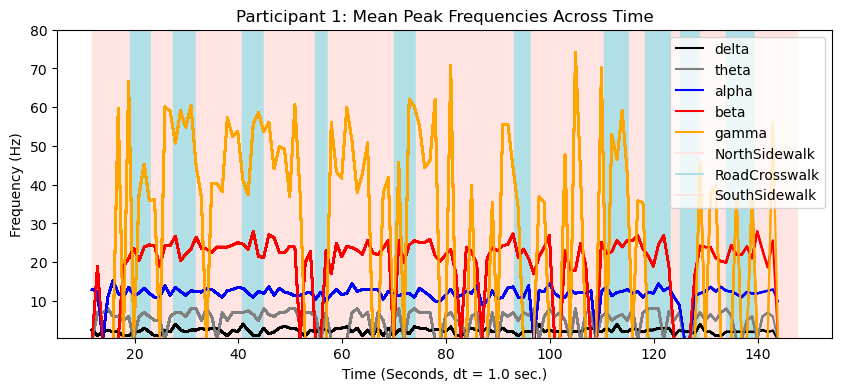

In [122]:
p1["eeg"]["vr"].PlotPSDGantt(
  title="Participant 1: Mean Peak Frequencies Across Time",
  start=11.85700011253357,
  end=147.57500004768372,
  fmin=0.5,
  fmax=80,
  figsize=(10,4),
  frequencies=["delta","theta","alpha","beta","gamma"],
  colors=["black","gray","blue","red","orange"],
  peak_threshold=50,
  representative_metric="mean",
  events=p1["events"],
  save_fig_filename="./data/p1/vr.gantt.png",
)

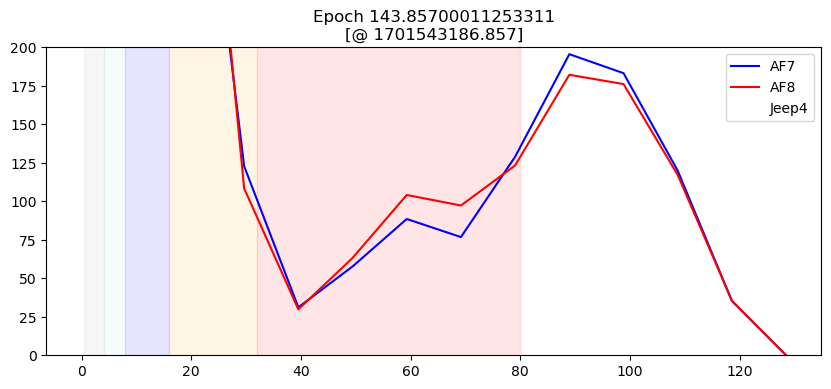

No EEG Data found. Ending plotting.
Generating video from frames...



(<unknown>:12366): GStreamer-CRITICAL **: 14:59:30.735: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@3123.425] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@3123.426] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./data/p1/vr.psd.avi in function 'icvExtractPattern'




Video generated. Now deleting extraneous frames from temp folder
Video finished generating!


In [67]:
p1["eeg"]["vr"].PlotPSDOverTime(
  frequencies=["delta","theta","alpha","beta","gamma"], pmax=200, 
  start=11.85700011253357, end=147.57500004768372,
  dt=0.2, render_dt=0, 
  detect_peaks=True, peak_threshold=200,
  events=p1["events"],
  save_video_filepath="./data/p1/vr.psd.avi"
)

### Participant #2

In [123]:
p2 = {
    "eeg":{
        "stand": EEGInterpreter("P2: Stand", "./data/p2/stand.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "head": EEGInterpreter("P2: Head", "./data/p2/head.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "eye": EEGInterpreter("P2: Eye", "./data/p2/eye.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "move": EEGInterpreter("P2: Move", "./data/p2/move.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "vr": EEGInterpreter("P2: VR", "./data/p2/vr.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False)
    },
    "events": Events("./data/p2/vr.events.csv")
}
for experiment in p2["eeg"].values():
  experiment.ReReference()
print(p2["events"].GetTrialInfo())

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trial #1:
	Corresponding Index to start: 0
	UNIX start: 1701823846.794 [Relative start: 0.0]
	UNIX end: 1701823921.887 [Relative end: 75.09300017356873]
	Total Duration: 75.09300017356873
	Number of positions recorded: 2
	Number of gaze targets: 193
Trial #2:
	Corresponding Index to start: 4468
	UNIX start: 1701823921.887 [Relative start: 75.09300017356873]
	UNIX end: 1701823941.095 [Relative end: 94.30100011825562]
	Total Duration: 19.20799994468689
	Number of positions recorded: 2
	Number of gaze targets: 57
Trial #3:
	Corresponding Index to start: 5597
	UNIX start: 1701823941

No EEG data detected


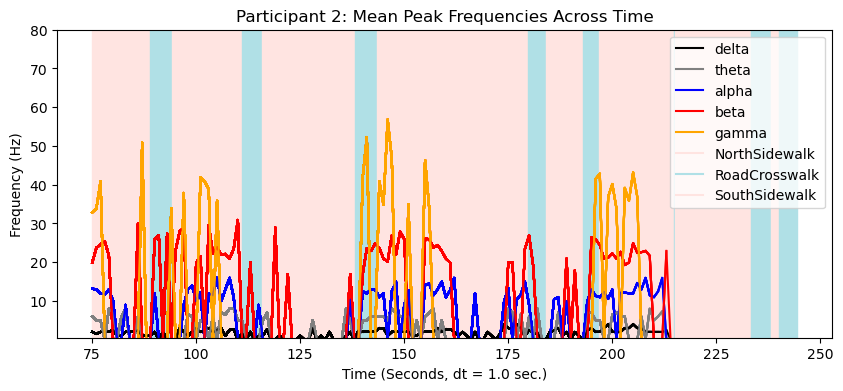

In [124]:
p2["eeg"]["vr"].PlotPSDGantt(
  title="Participant 2: Mean Peak Frequencies Across Time",
  start=75.09300017356873,
  end=244.54900002479553,
  fmin=0.5,
  fmax=80,
  figsize=(10,4),
  frequencies=["delta","theta","alpha","beta","gamma"],
  colors=["black","gray","blue","red","orange"],
  peak_threshold=50,
  representative_metric="mean",
  events=p2["events"],
  save_fig_filename="./data/p2/vr.gantt.png",
)

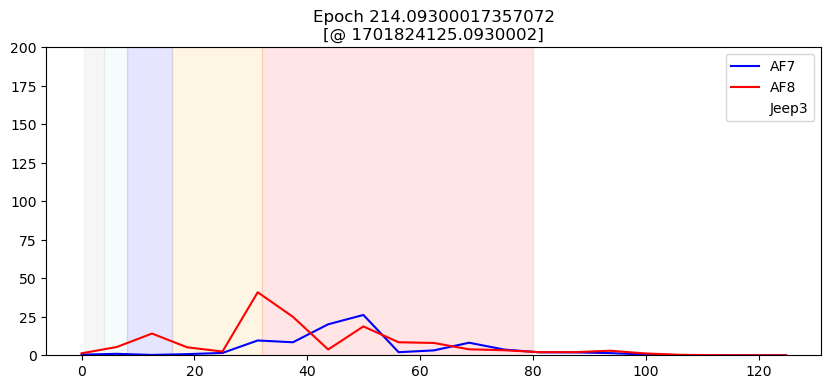

No EEG Data found. Ending plotting.
Generating video from frames...



(<unknown>:12366): GStreamer-CRITICAL **: 15:04:46.562: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@3439.254] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@3439.254] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./data/p2/vr.psd.avi in function 'icvExtractPattern'




Video generated. Now deleting extraneous frames from temp folder
Video finished generating!


In [71]:
p2["eeg"]["vr"].PlotPSDOverTime(
  frequencies=["delta","theta","alpha","beta","gamma"],  pmax=200, 
  start=75.09300017356873, end=244.54900002479553, 
  dt=0.2, render_dt=0, 
  detect_peaks=True, peak_threshold=200,
  events=p2["events"],
  save_video_filepath="./data/p2/vr.psd.avi"
)

### Participant #3

In [125]:
p3 = {
    "eeg":{
        "stand": EEGInterpreter("P3: Stand", "./data/p3/stand.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "head": EEGInterpreter("P3: Head", "./data/p3/head.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "eye": EEGInterpreter("P3: Eye", "./data/p3/eye.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "move": EEGInterpreter("P3: Move", "./data/p3/move.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "vr": EEGInterpreter("P3: VR", "./data/p3/vr.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False)
    },
    "events": Events("./data/p3/vr.events.csv")
}
for experiment in p3["eeg"].values():
  experiment.ReReference()
print(p3["events"].GetTrialInfo())

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trial #1:
	Corresponding Index to start: 0
	UNIX start: 1701917604.658 [Relative start: 0.0]
	UNIX end: 1701917619.975 [Relative end: 15.316999912261963]
	Total Duration: 15.316999912261963
	Number of positions recorded: 2
	Number of gaze targets: 40
Trial #2:
	Corresponding Index to start: 907
	UNIX start: 1701917619.975 [Relative start: 15.316999912261963]
	UNIX end: 1701917635.592 [Relative end: 30.93400001525879]
	Total Duration: 15.617000102996826
	Number of positions recorded: 2
	Number of gaze targets: 52
Trial #3:
	Corresponding Index to start: 1838
	UNIX start: 17019176

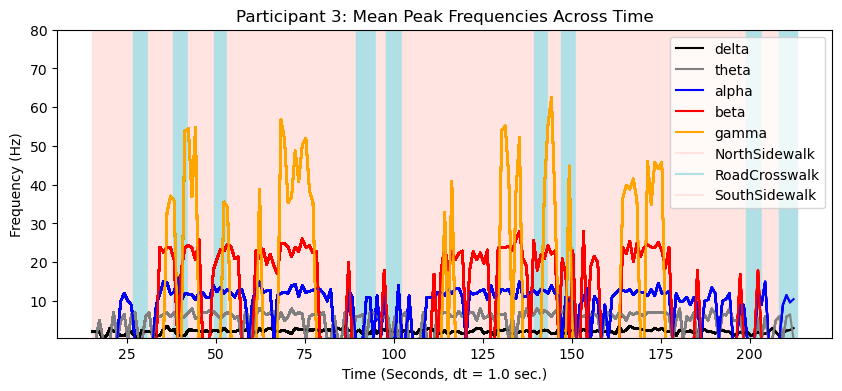

In [128]:
p3["eeg"]["vr"].PlotPSDGantt(
  title="Participant 3: Mean Peak Frequencies Across Time",
  start=15.316999912261963,
  end=213.3329999446869,
  fmin=0.5,
  fmax=80,
  figsize=(10,4),
  frequencies=["delta","theta","alpha","beta","gamma"],
  colors=["black","gray","blue","red","orange"],
  peak_threshold=50,
  representative_metric="mean",
  events=p3["events"],
  save_fig_filename="./data/p3/vr.gantt.png",
)

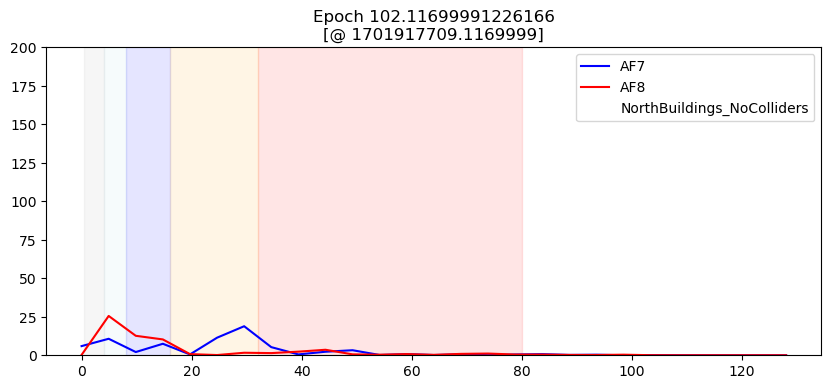

Generating video from frames...



(<unknown>:12366): GStreamer-CRITICAL **: 15:07:39.954: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@3612.619] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@3612.620] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./data/p3/vr.psd.avi in function 'icvExtractPattern'




Video generated. Now deleting extraneous frames from temp folder
Video finished generating!


In [74]:
p3["eeg"]["vr"].PlotPSDOverTime(
  frequencies=["delta","theta","alpha","beta","gamma"],  pmax=200, 
  start=15.316999912261963, end= 102.43899989128113, 
  dt=0.2, render_dt=0, 
  detect_peaks=True, peak_threshold=200,
  events=p3["events"],
  save_video_filepath="./data/p3/vr.psd.avi"
)

### Participant #4

In [129]:
p4 = {
    "eeg":{
        "stand": EEGInterpreter("P4: Stand", "./data/p4/stand.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "head": EEGInterpreter("P4: Head", "./data/p4/head.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "eye": EEGInterpreter("P4: Eye", "./data/p4/eye.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "move": EEGInterpreter("P4: Move", "./data/p4/move.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "vr": EEGInterpreter("P4: VR", "./data/p4/vr.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False)
    },
    "events": Events("./data/p4/vr.events.csv")
}
for experiment in p4["eeg"].values():
  experiment.ReReference()
print(p4["events"].GetTrialInfo())

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trial #1:
	Corresponding Index to start: 0
	UNIX start: 1701978745.377 [Relative start: 0.0]
	UNIX end: 1701978786.779 [Relative end: 41.401999950408936]
	Total Duration: 41.401999950408936
	Number of positions recorded: 2
	Number of gaze targets: 108
Trial #2:
	Corresponding Index to start: 2645
	UNIX start: 1701978786.779 [Relative start: 41.401999950408936]
	UNIX end: 1701978798.865 [Relative end: 53.48799991607666]
	Total Duration: 12.085999965667725
	Number of positions recorded: 2
	Number of gaze targets: 25
Trial #3:
	Corresponding Index to start: 3409
	UNIX start: 170197

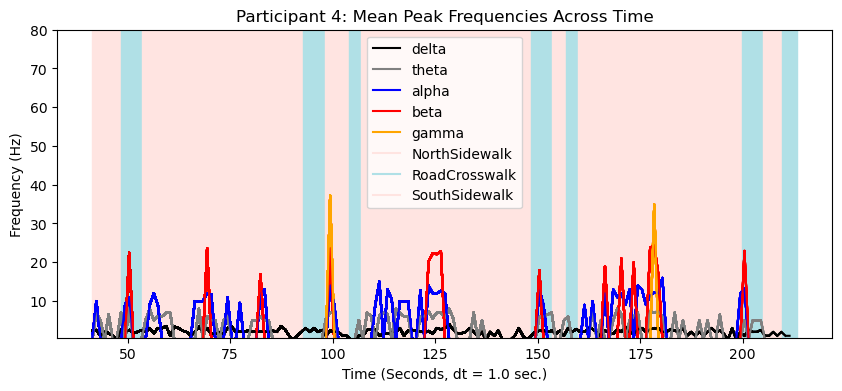

In [130]:
p4["eeg"]["vr"].PlotPSDGantt(
  title="Participant 4: Mean Peak Frequencies Across Time",
  start=41.401999950408936,
  end=213.27699995040894,
  fmin=0.5,
  fmax=80,
  figsize=(10,4),
  frequencies=["delta","theta","alpha","beta","gamma"],
  colors=["black","gray","blue","red","orange"],
  peak_threshold=50,
  representative_metric="mean",
  events=p4["events"],
  save_fig_filename="./data/p4/vr.gantt.png",
)

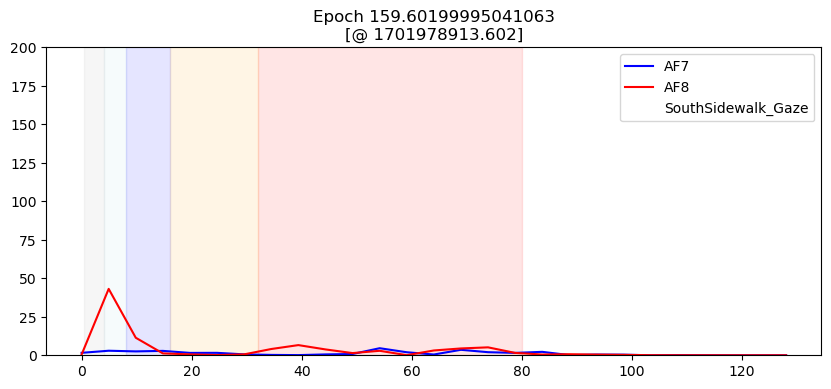

Generating video from frames...



(<unknown>:12366): GStreamer-CRITICAL **: 15:10:26.653: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@3779.311] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@3779.311] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./data/p4/vr.psd.avi in function 'icvExtractPattern'




Video generated. Now deleting extraneous frames from temp folder
Video finished generating!


In [77]:
p4["eeg"]["vr"].PlotPSDOverTime(
  frequencies=["delta","theta","alpha","beta","gamma"],  pmax=200, 
  start=41.401999950408936, end=159.81199979782104, 
  dt=0.2, render_dt=0, 
  detect_peaks=True, peak_threshold=200,
  events=p4["events"],
  save_video_filepath="./data/p4/vr.psd.avi"
)

### Participant #5

In [131]:
p5 = {
    "eeg":{
        "stand": EEGInterpreter("P5: Stand", "./data/p5/stand.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "head": EEGInterpreter("P5: Head", "./data/p5/head.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "eye": EEGInterpreter("P5: Eye", "./data/p5/eye.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "move": EEGInterpreter("P5: Move", "./data/p5/move.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False),
        "vr": EEGInterpreter("P5: VR", "./data/p5/vr.eeg.csv", timestamp_col="unix_ts", drop_channels=["AUX"], min_freq=0, max_freq=100, verbose=False)
    },
    "events": Events("./data/p5/vr.events.csv")
}
for experiment in p5["eeg"].values():
  experiment.ReReference()
print(p5["events"].GetTrialInfo())

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trial #1:
	Corresponding Index to start: 0
	UNIX start: 1702061166.449 [Relative start: 0.0]
	UNIX end: 1702061208.033 [Relative end: 41.58400011062622]
	Total Duration: 41.58400011062622
	Number of positions recorded: 2
	Number of gaze targets: 110
Trial #2:
	Corresponding Index to start: 2636
	UNIX start: 1702061208.033 [Relative start: 41.58400011062622]
	UNIX end: 1702061218.976 [Relative end: 52.527000188827515]
	Total Duration: 10.943000078201294
	Number of positions recorded: 2
	Number of gaze targets: 25
Trial #3:
	Corresponding Index to start: 3330
	UNIX start: 17020612

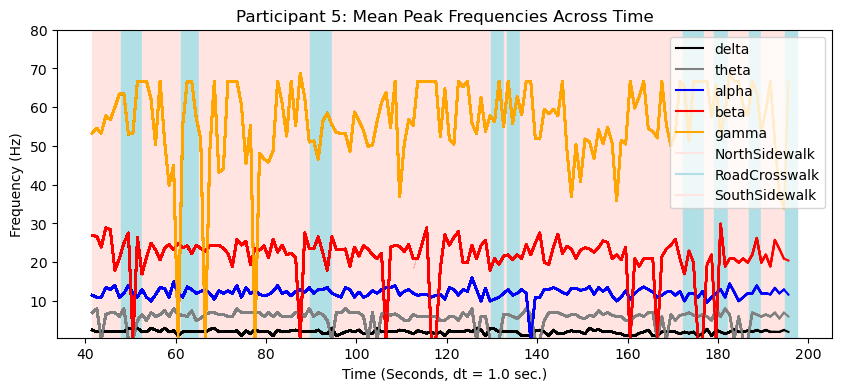

In [132]:
p5["eeg"]["vr"].PlotPSDGantt(
  title="Participant 5: Mean Peak Frequencies Across Time",
  start=41.58400011062622,
  end=197.54800009727478,
  fmin=0.5,
  fmax=80,
  figsize=(10,4),
  frequencies=["delta","theta","alpha","beta","gamma"],
  colors=["black","gray","blue","red","orange"],
  peak_threshold=50,
  representative_metric="mean",
  events=p5["events"],
  save_fig_filename="./data/p5/vr.gantt.png",
)

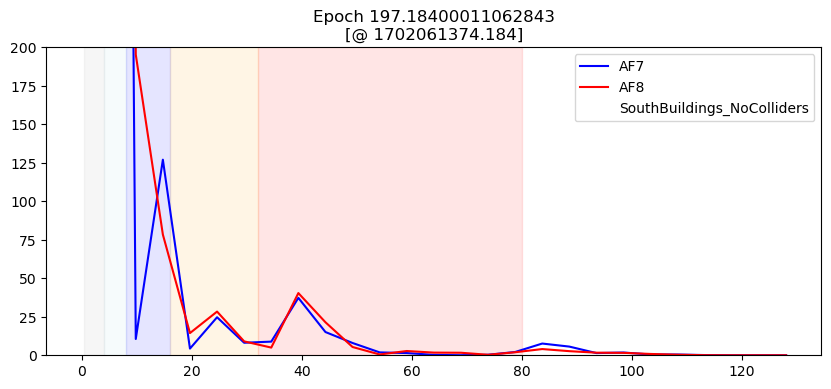

Generating video from frames...



(<unknown>:12366): GStreamer-CRITICAL **: 23:46:17.057: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@30019.946] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@30019.947] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./data/p5/vr.psd.avi in function 'icvExtractPattern'




Video generated. Now deleting extraneous frames from temp folder
Video finished generating!


In [133]:
p5["eeg"]["vr"].PlotPSDOverTime(
  frequencies=["delta","theta","alpha","beta","gamma"],  pmax=200, 
  start=41.58400011062622, end=197.54800009727478, 
  dt=0.2, render_dt=0, 
  detect_peaks=True, peak_threshold=200,
  events=p5["events"],
  save_video_filepath="./data/p5/vr.psd.avi"
)